In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['action_recognition_data', 'data', 'action']


In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [3]:
# initializing CNN
classifier = Sequential()

#Step 1 - Convoluabstion
classifier.add(Convolution2D(32, (3,3), input_shape = (64,64,3), activation = 'relu')) # 32 is no. of filters of size 3*3,,, size of image is 64*64 which has 3 color values viz RGB

# Step 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))


# Step 3- Flattening
classifier.add(Flatten()) # flatten converts into 1 array

In [4]:
# step 4 - Full Connection

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


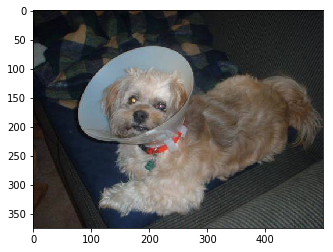

In [6]:
img_array = np.array(Image.open('../input/data/data/training_set/dogs/dog.957.jpg'))
plt.imshow(img_array)

In [7]:
path_train = '../input/data/data/training_set'
path_test = '../input/data/data/test_set'

# create datagenerator to preprocess and create batches of image to have more number of images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# read images from directory and resize(as done befor during convolution)
train_set = train_datagen.flow_from_directory(path_train,target_size =(64,64),batch_size = 32, class_mode = 'binary')

test_set = test_datagen.flow_from_directory(path_test,target_size =(64,64),batch_size = 32, class_mode = 'binary')


Found 1949 images belonging to 2 classes.
Found 971 images belonging to 2 classes.


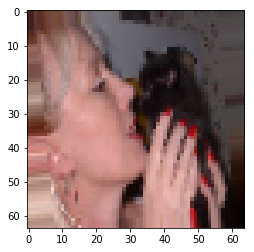

In [8]:
plt.imshow(train_set[0][0][10])

In [9]:
classifier.fit_generator(train_set,
                        steps_per_epoch = 100,
                        epochs = 8,
                        validation_data = test_set,
                        validation_steps = 50)

Epoch 1/8
100/100 [==============================] - 25s 250ms/step - loss: 0.7570 - acc: 0.5667 - val_loss: 0.6349 - val_acc: 0.6586
Epoch 2/8
100/100 [==============================] - 18s 184ms/step - loss: 0.6074 - acc: 0.6770 - val_loss: 0.5886 - val_acc: 0.6996
Epoch 3/8
100/100 [==============================] - 18s 185ms/step - loss: 0.5799 - acc: 0.7053 - val_loss: 0.5999 - val_acc: 0.6688
Epoch 4/8
100/100 [==============================] - 18s 183ms/step - loss: 0.5561 - acc: 0.7215 - val_loss: 0.6120 - val_acc: 0.6759
Epoch 5/8
100/100 [==============================] - 18s 181ms/step - loss: 0.5392 - acc: 0.7251 - val_loss: 0.5650 - val_acc: 0.7214
Epoch 6/8
100/100 [==============================] - 18s 184ms/step - loss: 0.5295 - acc: 0.7357 - val_loss: 0.5638 - val_acc: 0.7359
Epoch 7/8
100/100 [==============================] - 18s 183ms/step - loss: 0.5063 - acc: 0.7545 - val_loss: 0.5798 - val_acc: 0.7259
Epoch 8/8
100/100 [==============================] - 18s 184ms

In [10]:
classifier.history.history['acc']

[0.5664685643535873,
 0.6772072637499162,
 0.7053487644107558,
 0.7213525357810721,
 0.7251095806499832,
 0.7356897091768592,
 0.7545397616992836,
 0.7604884155556494]

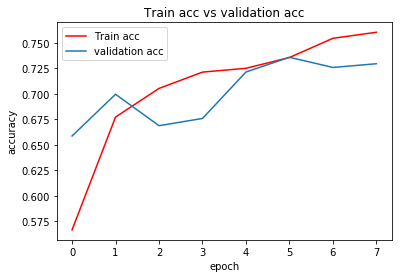

In [11]:
plt.plot(classifier.history.history['acc'],color = 'red')
plt.plot(classifier.history.history['val_acc'])
plt.title('Train acc vs validation acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train acc', 'validation acc'])
plt.show()

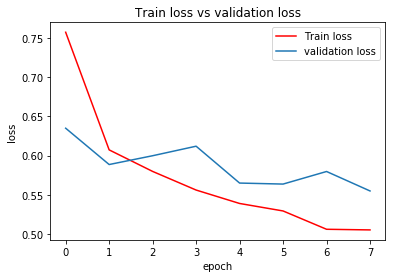

In [12]:
plt.plot(classifier.history.history['loss'],color = 'red')
plt.plot(classifier.history.history['val_loss'])
plt.title('Train loss vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'validation loss'])
plt.show()